<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA-SCIENCE-NA-PR-TICA/blob/master/S%C3%A9ries_Temporais_(Time_Series).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SÉRIES TEMPORAIS (Time Séries)



###1. Como importar Time Series em **Python**

In [0]:
#Importar pacotes e setar configurações de plots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set_style()

%matplotlib inline

In [91]:
#url do sata set

dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

#importar um csv para um dataframe
df = pd.read_csv(dataset_path)

#ver as primeiras 5 entradas
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [92]:
#saber o tipo da variável
df.DATE
df.dtypes

DATE      object
Value    float64
dtype: object

In [93]:

type(df.DATE[0])

str

In [94]:
#[ANTES] converter tipod a coluna DATE em datetime
print("[ANTES]")

display(df.DATE.head())

[ANTES]


0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [95]:
#[DEPOIS] converter o tipo da coluna DATE em datetime
print("[DEPOIS]")

pd.to_datetime(df.DATE, format="%m-%d-%Y").head()

[DEPOIS]


0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

In [96]:
#converter DATA para datetimee associar ao index do dataframe
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

#alinhar a coluna DATE
df.drop("DATE", inplace=True, axis=1)

df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


###2. Visulaizar Séries Temporais 

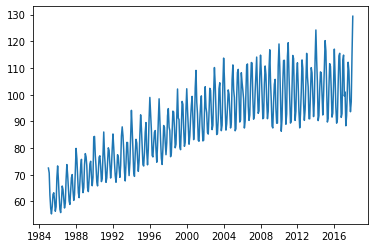

In [97]:
#plotar gráfico de consumo de eletricidade

plt.plot(df.index, df.Value)
plt.show();

###3. Como decompor uma Time Séries e, seus componetes 

É possível decompor uma série temporal se você considerar a série como uma combinação aditiva ou multiplicativa dos seus componetes.

A biblioteca *STATS* from statsmodels.tsa.seasonal import seasonal_decompose



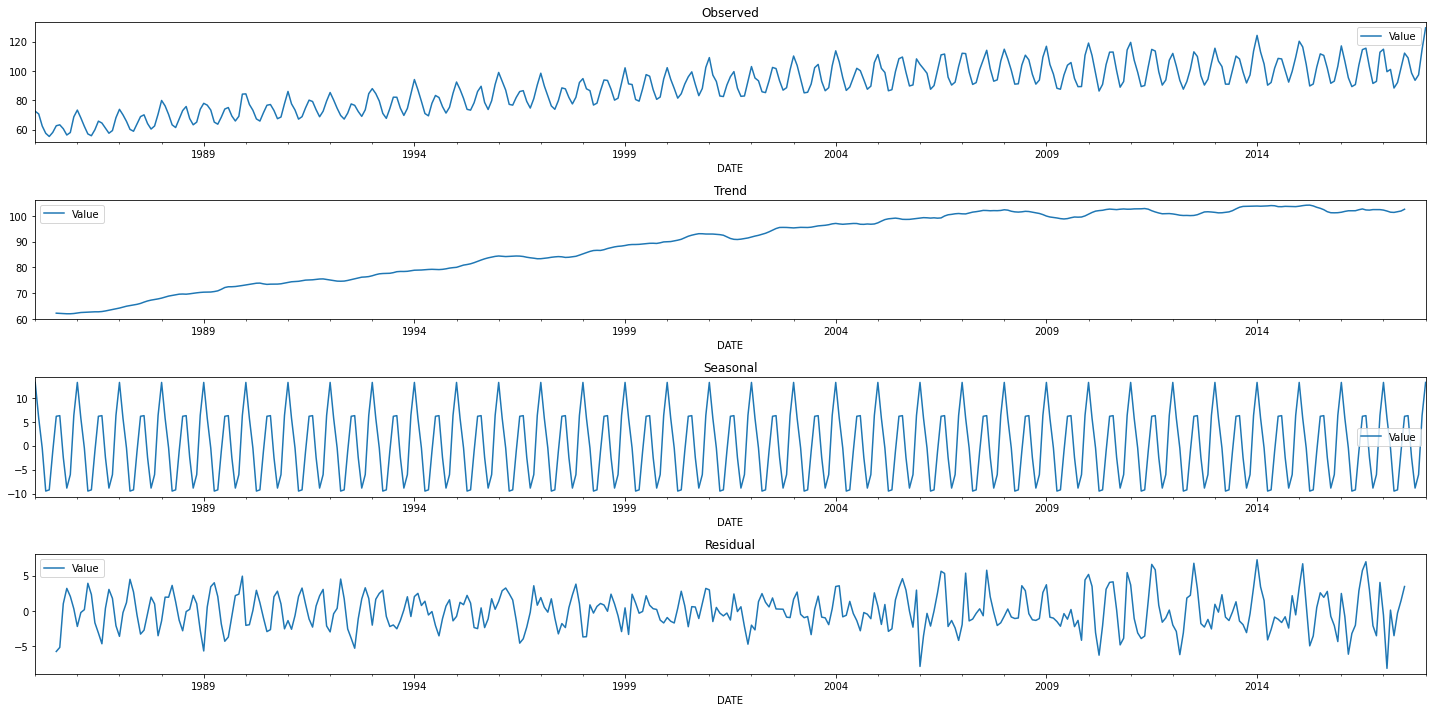

In [98]:
#salvar a decomposição em result
result=seasonal_decompose(df)

#plotar a decomposição
#result.plot();

# plotar maior
fig, (ax1,ax2,ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(20,10))
result.observed.plot(ax=ax1)
ax1.set_title("Observed")
result.trend.plot(ax=ax2)
ax2.set_title("Trend")
result.seasonal.plot(ax=ax3)
ax3.set_title("Seasonal")
result.resid.plot(ax=ax4)
ax4.set_title("Residual")

plt.tight_layout();

###4. Análise Exploratória e Extração de Features

In [99]:
ferroviaria_dataset = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"

#importar os dados da empresa ferroviária
df_trem=pd.read_csv(ferroviaria_dataset)

df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


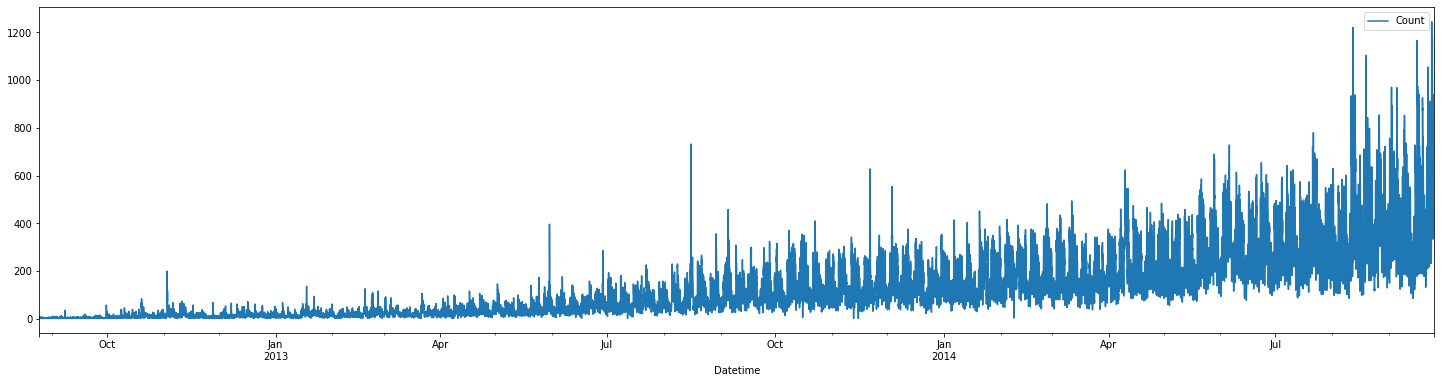

In [100]:
#converter a coluna DateTime em tipo datetime;
df_trem.Datetime=pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

#plotar gráfico
fig, ax=plt.subplots(figsize=(25,6))
df_trem.plot(x="Datetime", y="Count", ax=ax)

**Hipóteses:**



*   Pessoas viajem mais durante a semana.
*   Há períodos de pico, devido as idas e vindas do trabalho.
*   Há períodos dp mês ode a demanda por transporte é maior.





In [101]:
#criar features para cada período
df_trem["year"]=df_trem.Datetime.dt.year
df_trem["month"]=df_trem.Datetime.dt.month
df_trem["day"]=df_trem.Datetime.dt.day
df_trem["hour"]=df_trem.Datetime.dt.hour
#verificar os dias da semana
df_trem["day_of_week"]=df_trem.Datetime.dt.dayofweek

df_trem.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5




*   Pessoas vuajam mais durante a semana


In [102]:
#converter as variáveis em 0 ou 1
df_trem["weekend"]=0
df_trem.loc[(df_trem.day_of_week==5) | (df_trem.day_of_week==6), "weekend"]=1

ERROR! Session/line number was not unique in database. History logging moved to new session 72


In [103]:
df_trem.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [104]:
df_trem.tail()


,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0


In [105]:
#verificar os valores final de semana x semana
df_trem.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

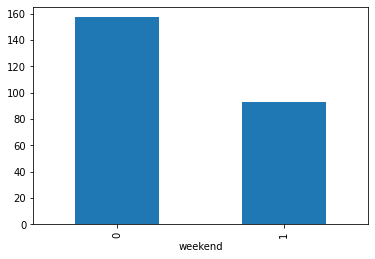

In [114]:
#plotar os valores final de semana x semana
df_trem.groupby("weekend").Count.mean().plot.bar();

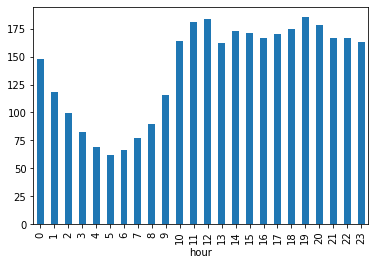

In [113]:
#plotar os valores em função dos horários 
df_trem.groupby("hour").Count.mean().plot.bar();

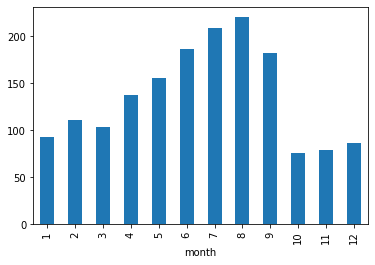

In [117]:
#plotar os valores em função dos meses
df_trem.groupby("month").Count.mean().plot.bar();